                                 x            y  surface   bottom
PT_Iron_Wire_Works      684771.523  9318302.929    8.599 -143.401
Kompleks_Jaya_Building  701628.002  9315266.869    3.067 -222.933
Kebayoran_Golf_Course   698780.860  9311825.334   10.689 -145.811
PT_Prospect_Motor       708268.797  9318569.593    3.195 -156.805
PLN_Explotasi_XII       702278.053  9310148.026   15.696 -112.384
Penerbangan_Sipil       705451.542  9315647.720    5.665  -94.335
PT_Pan_Nusantara        695972.020  9310065.630   18.368 -104.632
PT_Tunggal              707466.738  9313326.096   11.929 -234.071
Fatmawati_Rumah_sakit   698220.000  9305167.000   40.503  -59.497
Grogol                  697274.218  9318081.615    2.746 -197.254
                         z         type
PT_Iron_Wire_Works   8.599         else
PT_Iron_Wire_Works   7.599         clay
PT_Iron_Wire_Works   5.599         clay
PT_Iron_Wire_Works   4.599   sandy_tuff
PT_Iron_Wire_Works   3.599   sandy_tuff
PT_Iron_Wire_Works   2.599  clayey

<IPython.core.display.Javascript object>


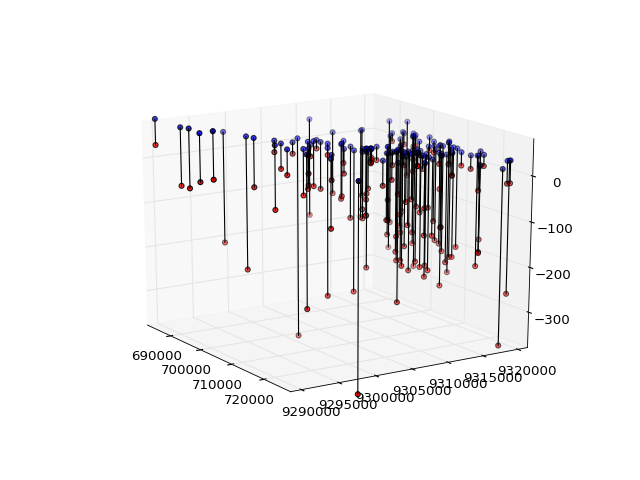

In [1]:
%matplotlib notebook
import os
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# read data
data_path = 'data/Imod Jakarta/'
raw = open(os.path.join(data_path, 'Boreholes_Jakarta.ipf')).read().split('\n')[10:-1]
wel = []
lay = []
wid = []
lid = []
for r in raw:
    x, y, name, z1, z2 = r.split(',')[:5]
    x = float(x)
    y = float(y)
    z1 = float(z1)
    z2 = float(z2)
    wel.append([x, y, z1, z2])
    nim = name.split('\\')[-1]
    wid.append(nim)
    with open(os.path.join(data_path, name.replace('\\', '/')+'.txt')) as f:
        d = f.read().split('\n')[4:-1]
        for l in d:
            z, t = l.split(',')
            lay.append([float(z), t])
            lid.append(nim)
    
wells = pd.DataFrame(wel, index=wid, columns=['x', 'y', 'surface', 'bottom'])
lays = pd.DataFrame(lay, index=lid, columns=['z', 'type'])
print(wells.head(10))
print(lays.head(10))

# process data
x, y, z1, z2 = np.array(wel).T
ax = plt.gca(projection='3d')
[ax.plot([i,i],[j,j],[k,h], c='black') for i,j,k,h in zip(x,y,z1,z2)]
ax.scatter(x, y, z1, c='b')
ax.scatter(x, y, z2, c='r')
plt.show()
        